In [273]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import math
import pandas as pd
import os.path, os, sys, glob, json, pathlib
import jinja2
from multiprocessing import Pool
from jinja2 import Template
from itertools import product
import ruamel_yaml as yaml
from io import StringIO 
from scipy import stats
import re
from scipy.interpolate import griddata

#plt.style.use('white_background')
plt.rcParams.update({'font.size': 18, 'figure.figsize': [10.0, 8]})
# Set default color for all text elements to black
plt.rcParams['text.color'] = 'black'
plt.rcParams['axes.labelcolor'] = 'black'
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'
plt.rcParams['axes.titlecolor'] = 'black'

# change this to the directory where you want to run the simulations    
#workdir = '/home/isabel/Documents/CPPM-master/cppm-crowded-main/mixed' # change this!!
plot_dir = '/home/isabel/Documents/CPPM-master/rust/duello/examples/cppm/log' # change this!!

In [370]:
def get_B2(temperatures, molality):
    b2 = np.zeros((len(temperatures), len(molality)))
    redb2 = np.zeros((len(temperatures), len(molality)))
    #temperatures = np.arange(273, 313, 1)
    for  Tidx, T in enumerate(temperatures):
        b2vals = []
        redb2vals = []
        for Midx, M in enumerate(molality):
            
            M =('{:.15f}'.format(M)).rstrip('0').rstrip('.')
            #print(T, M)
            file = f"log_{T}_{M}.log"
            with open(file, 'r') as f:
                lines = f.readlines()
                L1 = lines[7].split()
                L2 = lines[9].split()
                #b2vals.append(float(L1[8]))
                #redb2vals.append(float(L2[11]))
                #print(float(L1[8]))
                f.close()
                b2[Tidx, Midx] = float(L1[8])
                
                redb2[Tidx, Midx] = float(L2[11])
        #print(b2)
    return b2, redb2

def normalize_z_score(matrix):
    mean_val = np.mean(matrix)
    std_val = np.std(matrix)
    return (matrix - mean_val) / std_val

def plot_B2(temperatures, molality, b2, savepath=None):
     # Create a figure with a white background
    fig, ax = plt.subplots(facecolor='white')
    ax.set_facecolor('white')
    b2 = normalize_z_score(b2)
    Cbar = ax.imshow(b2, aspect='auto', origin='lower', 
               extent=[temperatures[0], temperatures[-1], molality[0], molality[-1]])
    fig.colorbar(Cbar , label=f'$B_2 (Å³)$')
    ax.set_ylabel('Molality (M)')
    ax.set_xlabel('Temperature (K)')
    ax.set_title(f'Second virial coefficient for two $P^1_8$ particles')
    
     # Adding contour where B2 is equal to zero
    T, M = np.meshgrid(temperatures, molality, indexing='ij')
    points = np.array([T.flatten(), M.flatten()]).T
    values = b2.T.flatten()
    #print(points , values)
    # Create a grid for interpolation
    grid_x, grid_y = np.mgrid[temperatures[0]:temperatures[-1]:10000j, molality[0]:molality[-1]:10000j]
    grid_z = griddata(points, values, (grid_x, grid_y), method='cubic')
    tol = 1*10**-6
    zeros = np.where(abs(grid_z) < tol)
    #zeros = np.where(abs(grid_z) < tol)
    #print(np.shape(zeros))
    # Plot the contour line where grid_z is equal to zero
    #ax.contour(grid_x, grid_y, grid_z, levels=[0], colors='black', linestyles='dashed')
    ax.plot(grid_x[zeros], grid_y[zeros], 'r--')
    #T, M = np.meshgrid(temperatures, molality, indexing='ij')
    #contour = ax.contour(T, M, b2.T, levels=[0], colors='black', linestyles='dashed')
    # Print the contour paths
    #for collection in contour.collections:
    #    for path in collection.get_paths():
    #        print("Contour path coordinates:")
    #        print(path.vertices)
    if savepath:
        plt.savefig(savepath, bbox_inches='tight', facecolor='white')
    
    plt.show()
    

In [ ]:
%cd $plot_dir
!pwd
mol = np.linspace(0.0025, 0.075 , 30)
mol = np.insert(mol, [0], [0.001, 0.0015, 0.002])
temp= np.arange(275,311,1)
B2, rB2 = get_B2(temp, mol)

plot_B2(temp, mol, B2.T)

/home/isabel/Documents/CPPM-master/rust/duello/examples/cppm/log
/home/isabel/Documents/CPPM-master/rust/duello/examples/cppm/log


In [141]:
arr = np.linspace(0.0025, 0.075, 30)


In [336]:
mol

array([0.001 , 0.0015, 0.002 , 0.0025, 0.005 , 0.0075, 0.01  , 0.0125,
       0.015 , 0.0175, 0.02  , 0.0225, 0.025 , 0.0275, 0.03  , 0.0325,
       0.035 , 0.0375, 0.04  , 0.0425, 0.045 , 0.0475, 0.05  , 0.0525,
       0.055 , 0.0575, 0.06  , 0.0625, 0.065 , 0.0675, 0.07  , 0.0725,
       0.075 ])

/home/isabel/Documents/CPPM-master/rust/duello/examples/cppm/log
/home/isabel/Documents/CPPM-master/rust/duello/examples/cppm/log
(36, 33)


TypeError: Shapes of x (36, 33) and z (33, 36) do not match

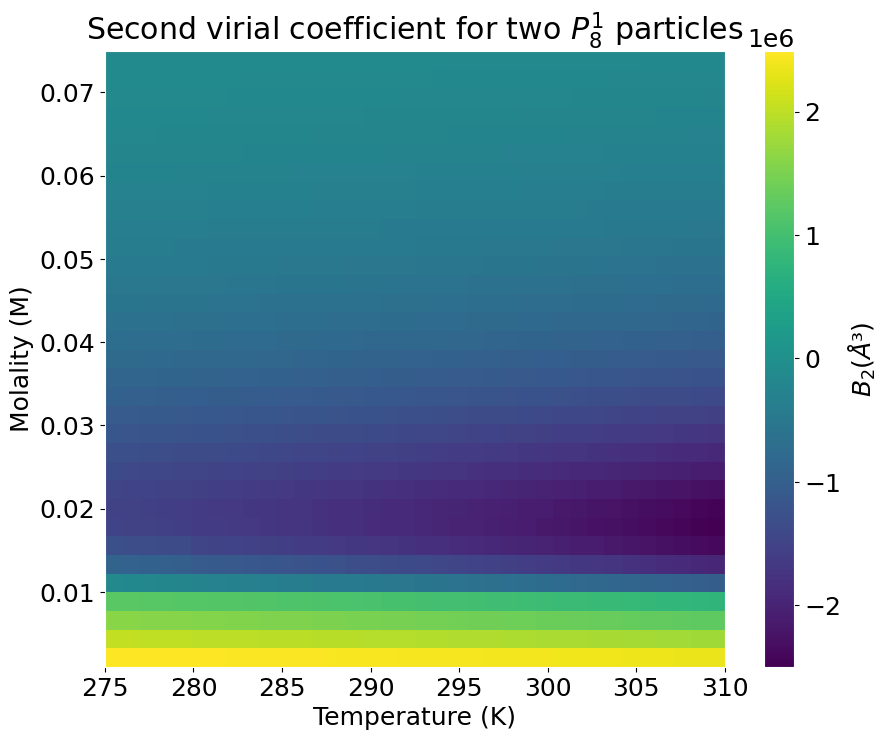

In [214]:
import numpy as np
import matplotlib.pyplot as plt
import re

# Set default color for all text elements to black
plt.rcParams['text.color'] = 'black'
plt.rcParams['axes.labelcolor'] = 'black'
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'
plt.rcParams['axes.titlecolor'] = 'black'

def extract_floats_from_line(line):
    # Regular expression to find all floats in the line
    float_pattern = re.compile(r"[-+]?\d*\.\d+|\d+")
    floats = [float(match) for match in float_pattern.findall(line)]
    return floats

def remove_trailing_zeros(value):
    return ('{:.15f}'.format(value)).rstrip('0').rstrip('.')

def plot_B2(temperatures, molality, b2, savepath=None):
    # Create a figure with a white background
    fig, ax = plt.subplots(facecolor='white')
    ax.set_facecolor('white')
    
    # Plotting the heatmap
    cax = ax.imshow(b2, aspect='auto', origin='lower', 
                    extent=[temperatures[0], temperatures[-1], molality[0], molality[-1]])
    fig.colorbar(cax, label=f'$B_2 (Å³)$')
    ax.set_ylabel('Molality (M)')
    ax.set_xlabel('Temperature (K)')
    ax.set_title(f'Second virial coefficient for two $P^1_8$ particles')
    
    # Adding contour where B2 is equal to zero
    T, M = np.meshgrid(temperatures, molality, indexing='ij')
    ax.contour(T, M, b2, levels=[0], colors='black', linestyles='dashed')
    
    if savepath:
        plt.savefig(savepath, bbox_inches='tight', facecolor='white')
    
    plt.show()

# Example usage
%cd $plot_dir
!pwd
mol = np.linspace(0.0025, 0.075 , 30)
mol = np.insert(mol, [0], [0.001, 0.0015, 0.002])
temp = np.arange(275, 311, 1)
B2, rB2 = get_B2(temp, mol)
print(np.shape(B2))
plot_B2(temp, mol, B2.T)